# Random Forest
Random Forest is an ensemble learning method that combines the predictions of multiple individual models to improve overall performance and robustness. It belongs to the broader class of bagging ensemble methods. The key idea behind Random Forest is to build a multitude of decision trees during training and then combine their predictions for more accurate and stable results.
## Dataset
The dataset I will be using is the Boston housing dataset. Detail information is explained in the README file.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('BostonHousing.csv')

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

n_times = int(1/2 * X_train.shape[1])

rf_reg = RandomForestRegressor(max_depth= n_times, random_state=42, 
                               n_estimators=600, n_jobs=-1, bootstrap=True)

# fit random forest regressor 
rf_reg.fit(X_train, y_train)

# predict y values
y_pred = rf_reg.predict(X_test)

# print scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.4f}".format(mse))
print("R2 score: {:.4f}".format(r2))

MSE: 11.0619
R2 score: 0.8543


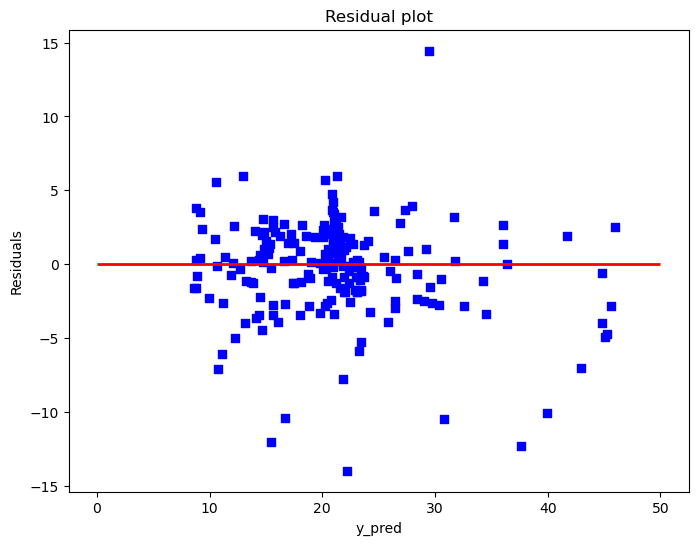

In [36]:
# residual plot
fig,ax = plt.subplots(figsize=(8, 6))
plt.scatter(y_pred, y_pred - y_test, c = "blue", marker = "s", label = "Random forest")
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 0, xmax = 50, lw = 2, color = "red")
plt.title("Residual plot")
plt.show()

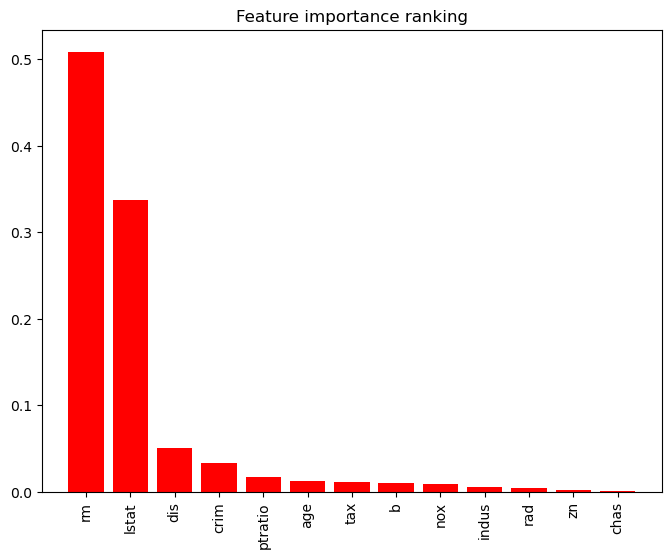

In [39]:
# feature importance ranking
importance = rf_reg.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(X_train.shape[1]), importance[indices], color="red")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.title("Feature importance ranking")
plt.show()